# K-nearest neighbors (KNN)

In machine learning, the problem of classifying an item into one of several classes is called classification. Here, we want to answer the question of what the given data is from two classes: 'bream' and 'smelt'. This type of problem is called **binary classification**.

* The data set we use here is an open data set from Kaggle: 
https://www.kaggle.com/datasets/aungpyaeap/fish-market

We will attempt to classify the data into 'bream' and 'smelt' using the **K-nearest neighbors (KNN)** algorithm. 

Machine learning algorithms can be broadly classified into **supervised learning** and **unsupervised learning**. In supervised learning, we do need **input (training data)** and corresponding **targets (correct answers)** for training the model. The input and target together form the training data. KNN is a supervised learning algorithm that falls under the category of instance-based learning.

KNN considers neighboring data points when determining a prediction for a given data point and selects the answer that is most prevalent among them as the correct answer. When making predictions for new data, it looks at the data points that are closest in straight-line distance. This algorithm can be computationally intensive when dealing with large datasets, as calculating the straight-line distances can be time-consuming.

In [2]:
#bream
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

#smelt
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


At first, we want to visualize the scatter plot of this dataset.

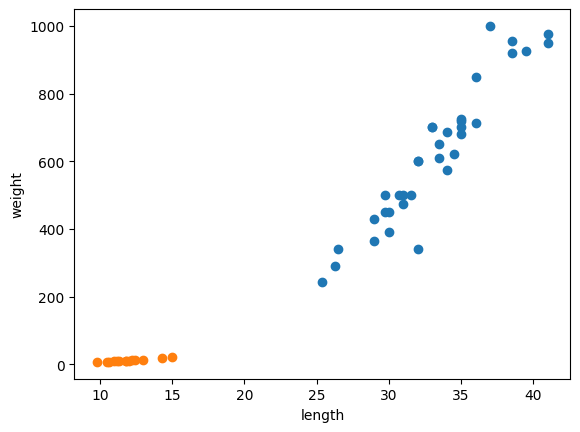

In [3]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(3, 2))
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

To use KNN in scikit-learn, we need to combine this data into a single dataset, and create a **two-dimensional list** where each feature list is arranged vertically. Here the for loop extracts elements from the 'length' and 'weight' lists one by one using the **zip()** function and assigns them to variables 'l' and 'w'.

To create a training set and test set, we need to ensure that both sets contain a well-distributed collection of 'bream' and 'smelt' samples to prevent sampling bias. We first can try numpy's **np.random.shuffle(index)** to randomly shuffle the indices and then manually divide the shuffled data into training and test sets.

Now we import the **KNeighborsClassifier** class. The **fit()** method is used to train models in scikit-learn, and the model's performance can be evaluated using the **score()** method. By default, KNeighborsClassifier considers 5 nearest neighbors, but this can be specified using the 'n_neighbors' parameter.

(35, 2)
(35,)


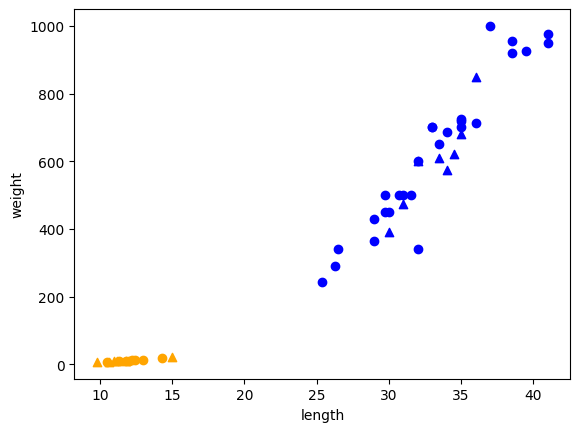

score :  1.0
[1]
18 0.9795918367346939
19 0.9795918367346939
20 0.9795918367346939
21 0.9795918367346939
22 0.9795918367346939
23 0.9795918367346939
24 0.9795918367346939
25 0.9795918367346939
26 0.9795918367346939
27 0.9795918367346939
28 0.9591836734693877
29 0.7142857142857143


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
'''
import sklearn
kn = sklearn.neighbors.KNeighborsClassifier()
'''

#combine two sets into a single dataset
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

fish_data = [[l,w] for l,w in zip(fish_length, fish_weight)]
# creating a list of correct answers manually
fish_target = [1]*len(bream_length) + [0]*len(smelt_length) #1: bream, 0: smelt

input_arr = np.array(fish_data) #2-dim array
target_arr = np.array(fish_target) #1 or 0

np.random.seed(42)
index = np.arange(49) #array from 0 to N-1
np.random.shuffle(index) #making shuffled index
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]
print(train_input.shape)
print(train_target.shape)
'''
print(train_input[train_target==1,0].shape)
print(train_input[:,0].shape)
print(test_input.shape)
print(test_target.shape)
'''

plt.scatter(train_input[train_target==1,0],train_input[train_target==1,1], facecolor='blue') #train_target = 1
plt.scatter(train_input[train_target==0,0],train_input[train_target==0,1], facecolor='orange') #train_target = 0
plt.scatter(test_input[test_target==1,0],test_input[test_target==1,1], marker='^', facecolor='blue') #test_target = 1
plt.scatter(test_input[test_target==0,0],test_input[test_target==0,1], marker='^', facecolor='orange') #test_target = 0
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(fish_data, fish_target) #<----------- training
score = kn.score(fish_data, fish_target) #test

print("score : ", score)

#test: a new prediction
print(kn.predict([[30,600]]))

for n in range(5,30):
    kn.n_neighbors = n
    score = kn.score(fish_data, fish_target)
    if score<1 : 
        print(n, score)

In [[l,w] for l,w in zip(fish_length, fish_weight)], the length and weight of each entry were directly constructed as a sublist within a list. However, using **np.column_stack((list1, list2))** we can create a two-dimensional array much more simply without such a process. Also **np.concatenate()** allows us to join multiple arrays along a specified axis. It takes a sequence of arrays as input and returns a single array that combines them. 

When working with large datasets, Python lists can be inefficient due to their dynamic nature. On the other hand, NumPy arrays are implemented in C or C++, which makes them much faster for operations on large datasets.

We can split the dataset into a training set and a test set by utilizing the **train_test_split()** function from **sklearn.model_selection** module. By default, 25% of samples are assigned to the test set. Moreover, **stratify** parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

score :  1.0
[[30, 600]] : [1.]
[[25, 150]] : [0.]


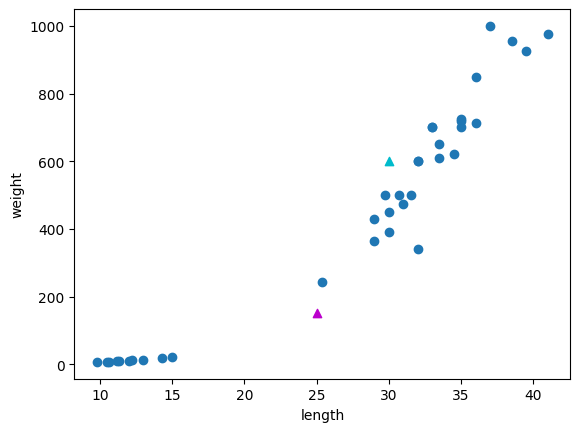

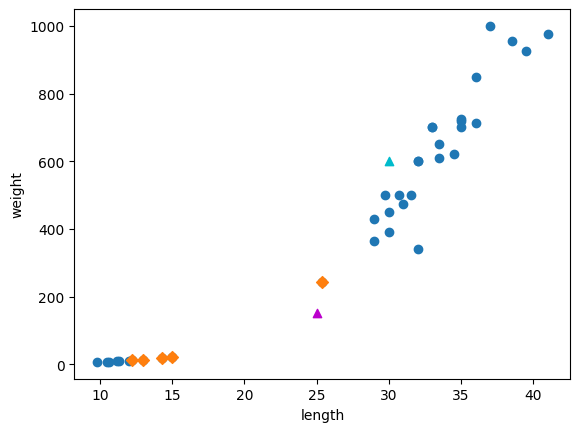

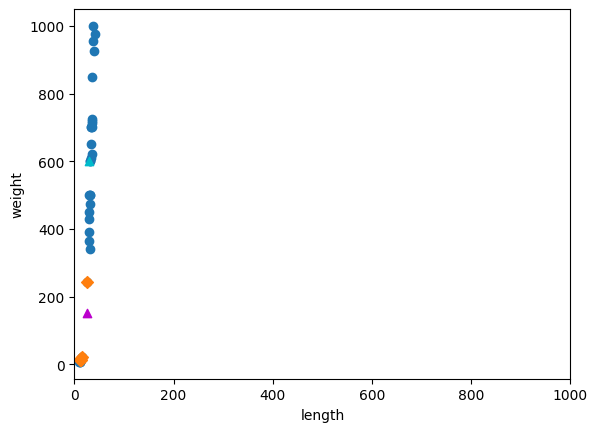

[[1. 0. 0. 0. 0.]]


In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#combine two sets into a single dataset
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

#results are arrays
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(len(bream_length)),np.zeros(len(smelt_length))))

(train_input, test_input, train_target, test_target) = train_test_split(
    fish_data, fish_target, stratify=fish_target, test_size=.25, random_state=42) #by default 25% becomes test set

#print(np.column_stack((test_input,test_target)))

kn = KNeighborsClassifier()
kn.fit(train_input, train_target) #training
score = kn.score(test_input, test_target) #test
print("score : ", score)

#test: predictions
breamY = [30,600]
print(f"[{breamY}] :", kn.predict([breamY]))
breamX = [25,150]
print(f"[{breamX}] :", kn.predict([breamX]))

plt.scatter(train_input[:,0],train_input[:,1]) #train_target = 0 or 1
plt.scatter(breamY[0],breamY[1], marker='^', facecolor='#00bbcc')
plt.scatter(breamX[0],breamX[1], marker='^', facecolor='#bb00cc')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# distances to neighbor and indices of neighboring samples (after training)
distances, indexes = kn.kneighbors([breamX])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(breamY[0],breamY[1], marker='^', facecolor='#00bbcc')
plt.scatter(breamX[0],breamX[1], marker='^', facecolor='#bb00cc')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(breamY[0],breamY[1], marker='^', facecolor='#00bbcc')
plt.scatter(breamX[0],breamX[1], marker='^', facecolor='#bb00cc')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000)) #defining the range of x-axis
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(train_target[indexes])


To understand why this new prediction was made, let's find the neighboring samples that are closest to [[25, 250]] using the **kneighbors()** method, which will return the specified number of nearest neighbors based on the **n_neighbors** variable.

If we adjust the range of the x and y-axis to be similar, we observe that the scales of the two features are significantly different. Therefore, in order to improve the performance of KNN algorithm, we should normalize the feature axes. This process is known as **data preprocessing**. The most widely used method for preprocessing is the **standard score** (also known as **z-score**). The standard score measures how far the feature values deviate from the mean, expressed in terms of standard deviations.

> Variance is the average squared distance of each data point from the mean of the data. Standard deviation is the square root of variance. A larger standard deviation indicates that the data is more spread out.

score :  1.0


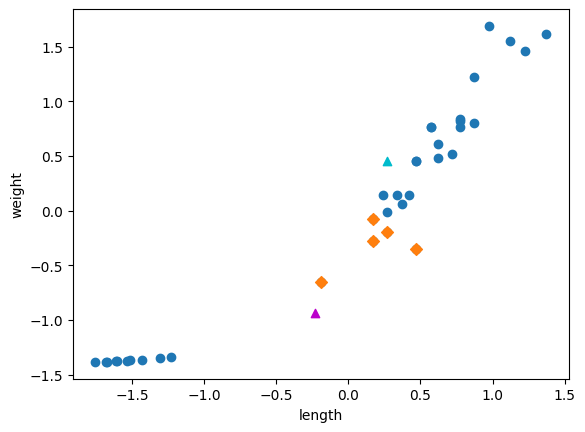

[[1. 1. 1. 1. 1.]]
[[30, 600]] : [1.]
[[25, 150]] : [1.]


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#combine two sets into a single dataset
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

#results are arrays
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(len(bream_length)),np.zeros(len(smelt_length))))

(train_input, test_input, train_target, test_target) = train_test_split(
    fish_data, fish_target, stratify=fish_target, test_size=.25, random_state=42) #by default 25% becomes test set

'''
train_input is 2D array with shape (36,2):

axis=0 is the index direction
axis=1 is the feature direction, 0(length) and 1(weight)
'''

mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

#data preprocessing: subtracts averages in mean[] from every row in train_input[], and divides by std
train_scaled = (train_input - mean)/std
test_scaled = (test_input - mean)/std

breamX = [25,150]
breamY = [30,600]
breamX_scaled = (breamX - mean)/std
breamY_scaled = (breamY - mean)/std

kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target) #training
score = kn.score(test_scaled, test_target) #test
print("score : ", score)

# distances to neighbor and indices of neighboring samples (after training)
distances, indexes = kn.kneighbors([breamX_scaled])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(breamY_scaled[0],breamY_scaled[1], marker='^', facecolor='#00bbcc')
plt.scatter(breamX_scaled[0],breamX_scaled[1], marker='^', facecolor='#bb00cc')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(train_target[indexes])

#test: predictions
print(f"[{breamY}] :", kn.predict([breamY_scaled]))
print(f"[{breamX}] :", kn.predict([breamX_scaled]))